In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

In [23]:
df = pd.read_csv("/content/sample_data/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


encoding

In [27]:
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])
df['poutcome']=encoder.fit_transform(df['poutcome'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


spliting data into x and y

In [28]:
X=df.drop(columns=['y'])
Y=df['y']
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


Training and testing data

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=27,stratify=Y)

Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
D1 = DecisionTreeClassifier(max_depth=5, random_state=42)
D1.fit(xtrain,ytrain)
D2 = D1.predict(xtest)
acc3 = accuracy_score(ytest,D2)
c1 =classification_report(ytest,D2)
print("The accuracy Score",acc3)
print("The Classification Report",c1)

The accuracy Score 0.8983425414364641
The Classification Report               precision    recall  f1-score   support

          no       0.91      0.98      0.94       801
         yes       0.62      0.29      0.39       104

    accuracy                           0.90       905
   macro avg       0.77      0.63      0.67       905
weighted avg       0.88      0.90      0.88       905



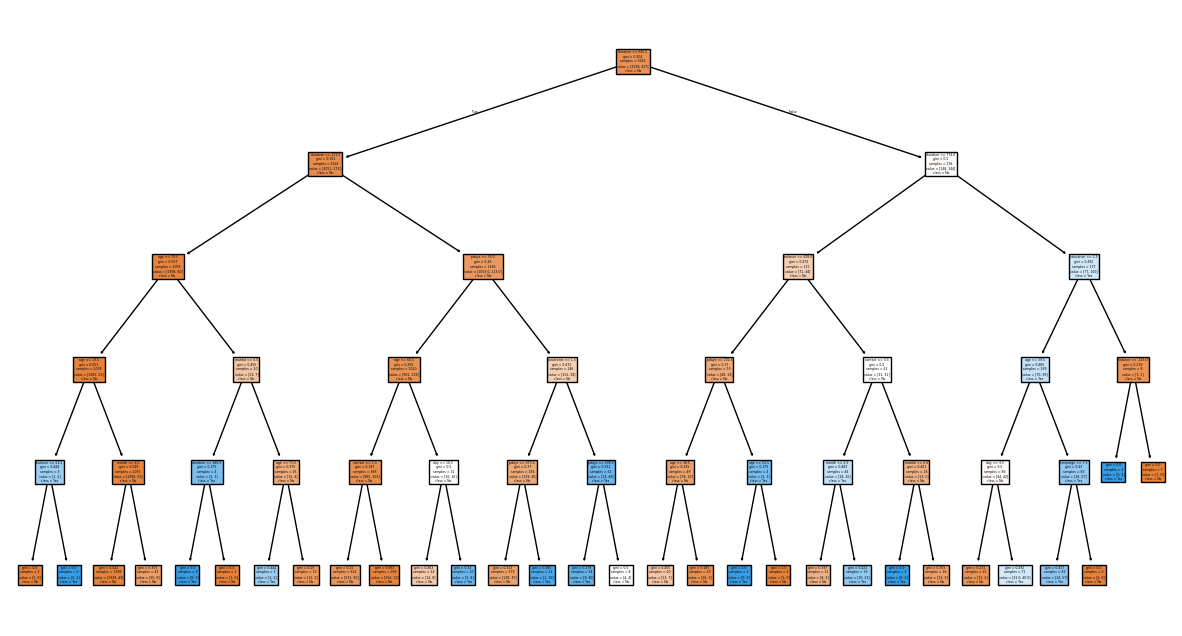

In [42]:
plt.figure(figsize=(15, 8))
plot_tree(D1 , feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()